In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\8.twospirals.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [4]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [5]:
df[2].unique()

array([0, 1], dtype=int64)

### Observation:  we can say that our task is binary classification task as our target variable have 2 classes.

In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [7]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

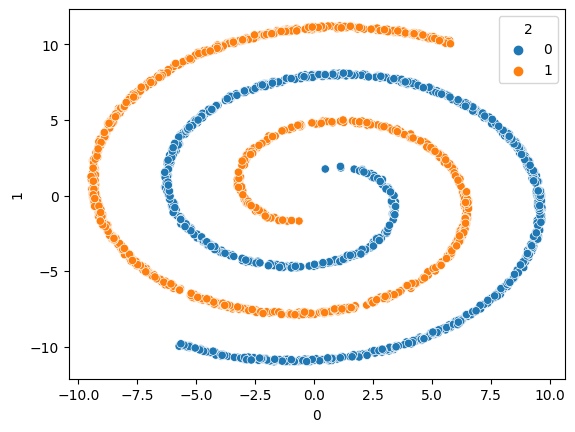

In [8]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

### Observation: By viewing the above graph we can easily say that x and y s have non linear relationship.

In [9]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

### Using Relu

In [12]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(24,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(22,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 24)                504       
                                                                 
 dense_7 (Dense)             (None, 22)                550       
                                                                 
 dense_8 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=25,validation_split=0.1)

Epoch 1/25
324/324 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.6475 - val_loss: 0.6581 - val_accuracy: 0.6722
Epoch 2/25
324/324 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.6414 - val_loss: 0.5730 - val_accuracy: 0.6167
Epoch 3/25
324/324 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7284 - val_loss: 0.4325 - val_accuracy: 0.7722
Epoch 4/25
324/324 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8642 - val_loss: 0.2982 - val_accuracy: 0.8778
Epoch 5/25
324/324 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.9012 - val_loss: 0.2341 - val_accuracy: 0.9278
Epoch 6/25
324/324 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9648 - val_loss: 0.1787 - val_accuracy: 0.9889
Epoch 7/25
324/324 [==============================] - 0s 1ms/step - loss: 0.1613 - accuracy: 0.9926 - val_loss: 0.1509 - val_accuracy: 1.0000
Epoch 

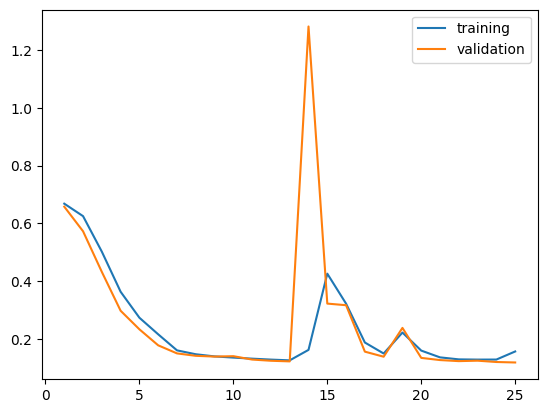

In [15]:
plt.plot(range(1,26),history.history["loss"],label="training")
plt.plot(range(1,26),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 7s 714us/step


<Axes: >

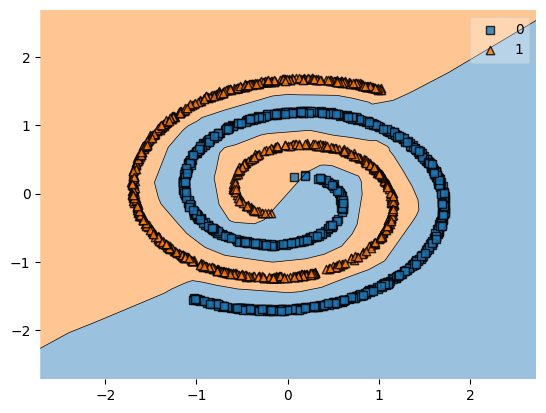

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 8s 784us/step


<Axes: >

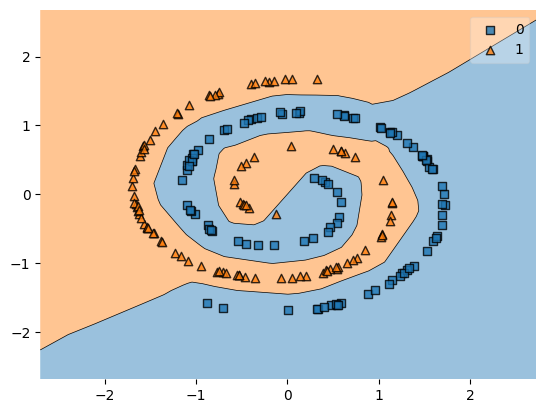

In [17]:
plot_decision_regions(x_testp,y_test.values,clf=model)